<a href="https://colab.research.google.com/github/raza-abidii/raza_projects_labs/blob/main/Module_4_Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 4: Perceptron and Gradient Descent
## Lab 1: Perceptron

In this lab, we will be studying the perceptron learning algorithm.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
X = np.array([
    [-2, 4],
    [4, 1],
    [1, 6],
    [2, 4],
    [6, 2]
])

In [3]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [4]:
y = np.array([-1, -1, 1, 1, 1])

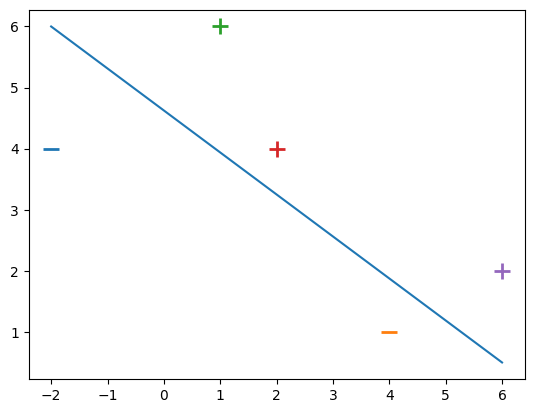

In [5]:
for d, sample in enumerate(X):
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

plt.plot([-2, 6], [6, 0.5])

Finally we can code our Perceptron algorithm using our update rule. To keep it simple, we will linearly loop over the sample set. For larger data sets it makes sence, to randomly pick a sample during each iteration in the for-loop.

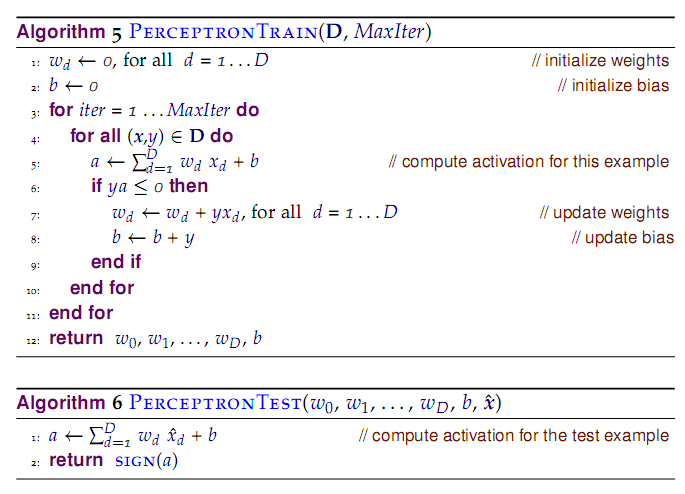

The algorithm is shown in the above image.

In [6]:
def perceptron_algo(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 10

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
    return w

In [7]:
def perceptron_algo_plot(X, Y):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    eta = 1
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

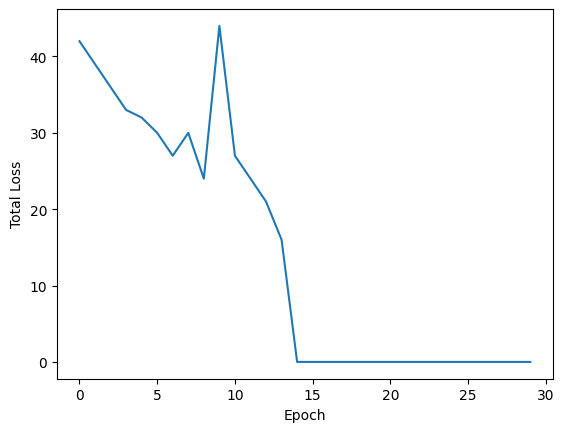

In [8]:
w = perceptron_algo_plot(X, y)

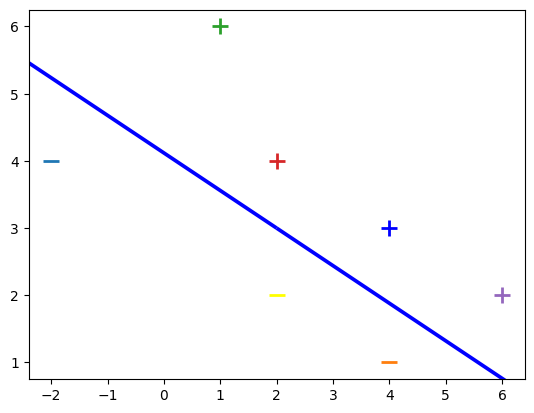

In [9]:
for d, sample in enumerate(X):
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)


plt.scatter(2, 2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4, 3, s=120, marker='+', linewidths=2, color='blue')

x2 = [w[0], w[1], -w[1], w[0]]
x3 = [w[0], w[1], w[1], -w[0]]

x2x3 = np.array([x2, x3])
X, Y, U, V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X, Y, U, V, scale=1, color='blue')

In [10]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [11]:
y = np.array([-1, -1, 1, -1, -1])

[-2.  3. 15.]


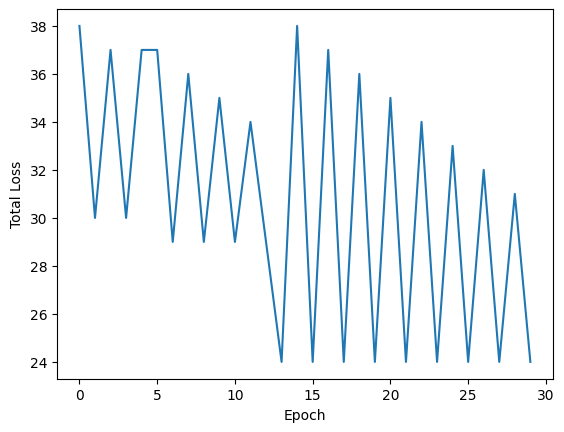

In [12]:
print(perceptron_algo_plot(X, y))

## **Additional Critical Thinking Questions**

1. Consider the following dataset where x = (x1, x2) ∈ {0, 1}× {0, 1}, y ∈ {−, +}. Note that this dataset is corresponding to the boolean function “AND” over the 2-bit binary input.

  Suppose we are training a Perceptron to learn on this dataset and we initialize w0 = 0 and b0 = 0.

  Please i) answer if this dataset is learnable by Perceptron, and ii) if so, write down the weights update procedure for each iteration; if not, explain why.

Ans:

**i)** Yes — the 2-bit AND is linearly separable, so a perceptron can learn it.
(For example $w=(1,1),\,b=-1.5$ gives $w\cdot x+b>0$ only for $(1,1)$.)

**ii)** With labels encoded as $y\in\{+1,-1\}$ ( '+'↦+1, '−'↦−1 ) and learning rate $\eta=1$, the standard perceptron update is:

$$
\text{for each training pair }(x,y):\quad
\text{if }y\,(w\cdot x + b)\le 0\text{ (misclassified) then }
\begin{cases}
w \leftarrow w + y\,x\\[4pt]
b \leftarrow b + y
\end{cases}
$$

**Example (one pass) starting from $w_0=(0,0),\,b_0=0$ and dataset order $(0,0,-),(0,1,-),(1,0,-),(1,1,+)$:**

* Step 1: $x=(0,0),y=-1$. $w\cdot x+b=0\Rightarrow$ misclassified.
  $w\leftarrow(0,0)+(-1)(0,0)=(0,0),\; b\leftarrow0+(-1)=-1.$

* Step 2: $x=(0,1),y=-1$. $w\cdot x+b=-1\Rightarrow$ correct (no change).

* Step 3: $x=(1,0),y=-1$. $w\cdot x+b=-1\Rightarrow$ correct (no change).

* Step 4: $x=(1,1),y=+1$. $w\cdot x+b=-1\Rightarrow$ misclassified.
  $w\leftarrow(0,0)+(1)(1,1)=(1,1),\; b\leftarrow-1+1=0.$

----

2. Extending AND to any boolean functions over a 2-bit binary input, where we have (2^2)^2 = 16 possible distinct boolean functions in total, among which how many of them can be learnable by a Perceptron?

  Please also write down the truth table(s) of the boolean functions that are not learnable, if there are any.

Ans: Out of the $16$ possible Boolean functions on 2 bits, **14** are learnable by a perceptron and **2** are not.

The two non-learnable functions are **XOR** (exclusive OR) and **XNOR** (equivalence). They are not linearly separable in the 2-D input space, so no single linear classifier (perceptron) can separate + from − for those labelings.

**Truth tables** (use the input order $(x_1,x_2)=(0,0),(0,1),(1,0),(1,1)$):

* **XOR** (positive iff exactly one input is 1)

| $x_1$ | $x_2$ | XOR output |
| ----- | ----- | ---------- |
| 0     | 0     | −          |
| 0     | 1     | +          |
| 1     | 0     | +          |
| 1     | 1     | −          |


* **XNOR** (positive iff inputs are equal) — the negation of XOR

| $x_1$ | $x_2$ | XNOR output |
| ----- | ----- | ----------- |
| 0     | 0     | +           |
| 0     | 1     | −           |
| 1     | 0     | −           |
| 1     | 1     | +           |

# Things to try


1.   Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.
2.   Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?
4. Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.



In [13]:
import pandas as pd

sonar_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data"
df_sonar = pd.read_csv(sonar_url, header=None)
print(df_sonar.head())

       0       1       2       3       4       5       6       7       8   \
0  0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2  0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3  0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4  0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   

       9   ...      51      52      53      54      55      56      57  \
0  0.2111  ...  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  0.0084   
1  0.2872  ...  0.0084  0.0089  0.0048  0.0094  0.0191  0.0140  0.0049   
2  0.6194  ...  0.0232  0.0166  0.0095  0.0180  0.0244  0.0316  0.0164   
3  0.1264  ...  0.0121  0.0036  0.0150  0.0085  0.0073  0.0050  0.0044   
4  0.4459  ...  0.0031  0.0054  0.0105  0.0110  0.0015  0.0072  0.0048   

       58      59  60  
0  0.0090  0.0032   R  
1  0.0052  0.0044   R  
2  0.0095  0.0078   

In [14]:
X_sonar = df_sonar.iloc[:, :-1]
y_sonar = df_sonar.iloc[:, -1]

y_sonar = y_sonar.replace({'M': 1, 'R': -1})

print("Features (X_sonar) shape:", X_sonar.shape)
print("Labels (y_sonar) shape:", y_sonar.shape)
print("First 5 labels (y_sonar):", y_sonar.head())

Features (X_sonar) shape: (208, 60)
Labels (y_sonar) shape: (208,)
First 5 labels (y_sonar): 0   -1
1   -1
2   -1
3   -1
4   -1
Name: 60, dtype: int64


/tmp/ipython-input-4117114984.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_sonar = y_sonar.replace({'M': 1, 'R': -1})


array([ 1.6907,  0.7052,  0.9593,  5.851 ,  3.4659, -0.1029,  1.36  ,
       -7.3028, -5.2774,  1.2584, -0.3634, -1.3443, -0.6485,  3.1836,
        6.9911, -0.0434, -0.6616,  3.0586, -1.024 , -2.5623,  3.9359,
        1.8532, -2.9508,  2.7451,  2.8699, -0.1965,  0.8353,  1.8411,
       -4.8273,  1.9505,  1.2316,  0.1397,  1.8597, -0.1563,  2.7359,
       -2.5188, -3.2166, -0.1944, -2.5343,  0.1467,  8.7181,  3.2636,
        1.7538, -4.2897, -1.4626,  2.9711,  0.725 ,  0.564 ,  0.9516,
       -0.1275,  0.3017,  0.4474,  0.5009,  0.2667,  0.289 , -0.2774,
        0.035 ,  0.7219,  1.0123,  1.4087])

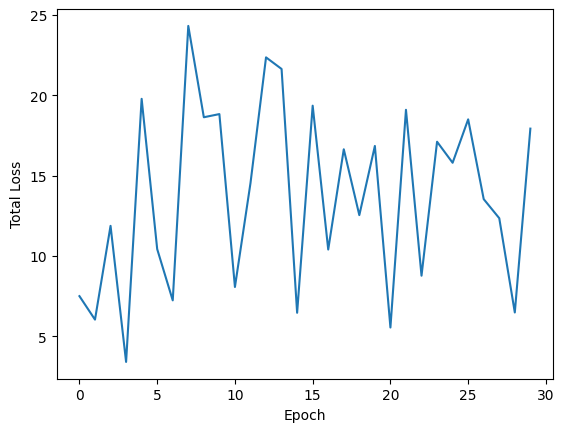

In [15]:
perceptron_algo_plot(X_sonar.values, y_sonar.values)

In [16]:
X_nonlinear = np.array([
    [0, 0, -1],
    [0, 1, -1],
    [1, 0, -1],
    [1, 1, -1]
])

y_nonlinear = np.array([-1, 1, 1, -1])

print("Non-linear dataset (X_nonlinear):\n", X_nonlinear)
print("Non-linear labels (y_nonlinear):\n", y_nonlinear)

Non-linear dataset (X_nonlinear):
 [[ 0  0 -1]
 [ 0  1 -1]
 [ 1  0 -1]
 [ 1  1 -1]]
Non-linear labels (y_nonlinear):
 [-1  1  1 -1]


array([0., 0., 0.])

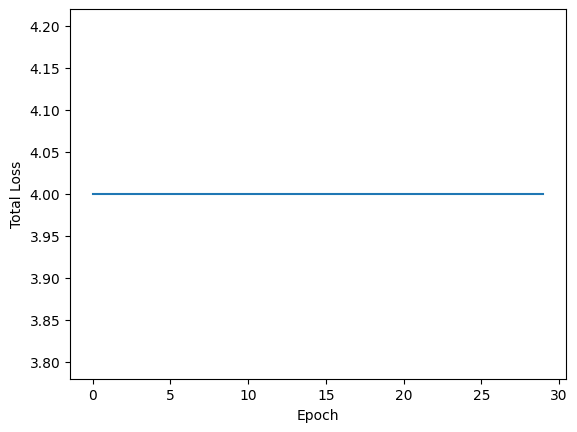

In [17]:
perceptron_algo_plot(X_nonlinear, y_nonlinear)

In [18]:
def perceptron_algo_plot(X, Y, eta=1):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :param eta: learning rate
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

Running with eta = 0.1


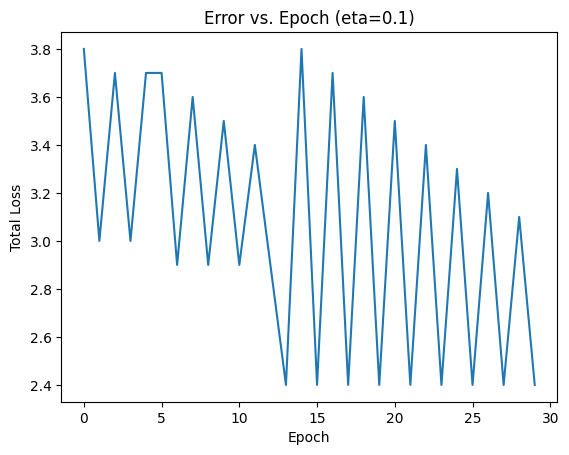


Running with eta = 1.0


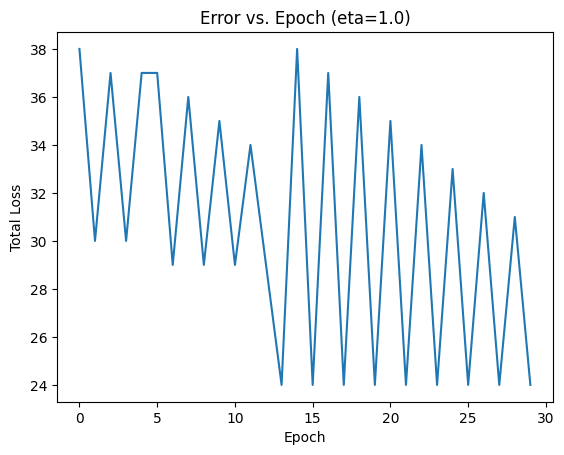


Running with eta = 10.0


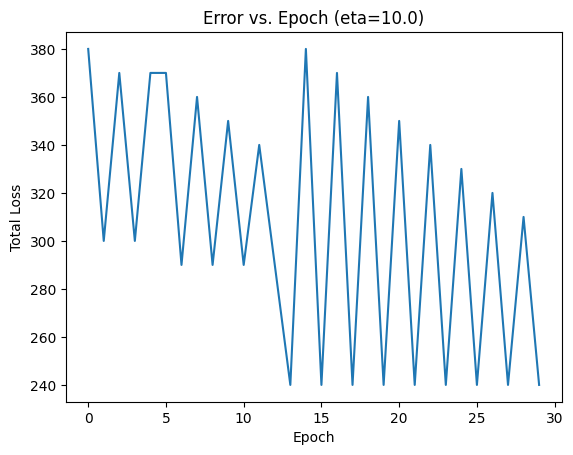


Running with eta = 100.0


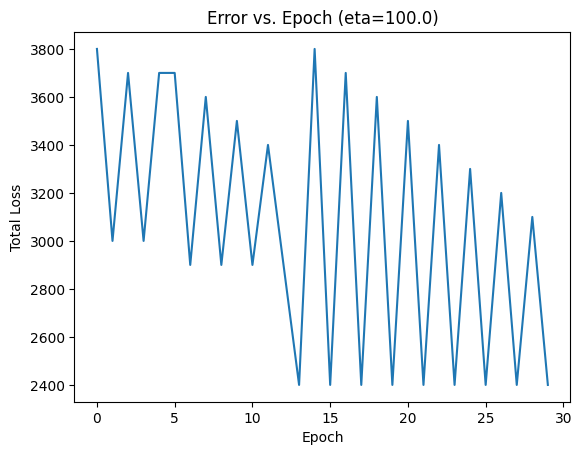

In [19]:
print("Running with eta = 0.1")
plt.figure()
perceptron_algo_plot(X, y, eta=0.1)
plt.title('Error vs. Epoch (eta=0.1)')
plt.show()

print("\nRunning with eta = 1.0")
plt.figure()
perceptron_algo_plot(X, y, eta=1.0)
plt.title('Error vs. Epoch (eta=1.0)')
plt.show()

print("\nRunning with eta = 10.0")
plt.figure()
perceptron_algo_plot(X, y, eta=10.0)
plt.title('Error vs. Epoch (eta=10.0)')
plt.show()

print("\nRunning with eta = 100.0")
plt.figure()
perceptron_algo_plot(X, y, eta=100.0)
plt.title('Error vs. Epoch (eta=100.0)')
plt.show()

## Summary:

### Data Analysis Key Findings

*   The Perceptron algorithm was applied to the Sonar dataset, a non-linearly separable toy dataset, and a linearly separable dataset to observe its convergence behavior.
*   On the Sonar dataset, the error generally decreased over iterations, suggesting some degree of separability, but did not converge to zero, implying the dataset is likely not perfectly linearly separable.
*   When applied to a non-linearly separable toy dataset, the Perceptron algorithm's error plot showed oscillation rather than convergence, which is the expected behavior for a linear model on such data.
*   For a linearly separable dataset, the learning rate significantly influenced convergence:
    *   Small learning rates ($\eta = 0.1$) resulted in slow but steady convergence.
    *   A medium learning rate ($\eta = 1.0$) led to faster convergence.
    *   Large learning rates ($\eta = 10.0$ and $\eta = 100.0$) caused the error to oscillate wildly and fail to converge.

### Insights or Next Steps

*   The Perceptron algorithm is guaranteed to converge only on linearly separable datasets; for non-linearly separable data, it will not converge and may oscillate.
*   The choice of learning rate is crucial for the convergence of the Perceptron algorithm on linearly separable data; a learning rate that is too large can prevent convergence.
